In [1]:
# importing libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# setting color palette

colors = [
    (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
    (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
    (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
    (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
]

sns.set(color_codes=True)
sns.set_palette(colors)

<br>
<br>
<br>

### Data Collection

This dataset is a modified version of original dataset.

In [3]:
# loading csv data
data = pd.read_csv("../data/data.csv")
data.head()

,heart_disease,age,gender,chest_pain,resting_blood_pressure,cholesterol
0,no,63,male,asymptomatic,145,233
1,no,37,male,non-anginal pain,130,250
2,no,41,female,atypical angina,130,204
3,no,56,male,atypical angina,120,236
4,no,57,female,typical angina,120,354


In [4]:
# checking shape
data.shape

(302, 6)

In [5]:
# checking for duplicate values
data.duplicated().any()

False

In [6]:
# checking for null values
data.isna().any().any()

False

<br>
<br>
<br>

### Analysis

#### Heart Disease

Indicates whether a patient have a heart disease or not<br>
```
yes -> have heart disease
no -> does not have heart disease
```

In [7]:
# extracting output
heart_disease = data.heart_disease
heart_disease.head(3)

0    no
1    no
2    no
Name: heart_disease, dtype: object

In [8]:
# checking distribution
heart_disease.value_counts()

no     164
yes    138
Name: heart_disease, dtype: int64

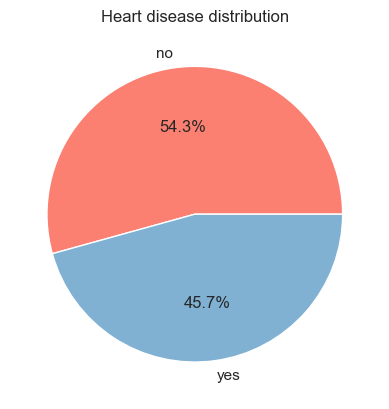

In [9]:
# distribution pie chart
plt.pie(x=heart_disease.value_counts().values, labels=['no', 'yes'], autopct='%0.1f%%', colors=sns.color_palette())
plt.title('Heart disease distribution')
plt.show()

The dataset have almost same proportion of patients with a heart disease and patients without.

<br>
<br>
<hr>

#### Age

Age of the patient in years

In [10]:
# extracting age
age = data.age
age.head(3)

0    63
1    37
2    41
Name: age, dtype: int64

In [11]:
# general stats
age.describe()

count    302.00000
mean      54.42053
std        9.04797
min       29.00000
25%       48.00000
50%       55.50000
75%       61.00000
max       77.00000
Name: age, dtype: float64

The age of patients lie between 29 and 77 years

In [12]:
# calculating mean, mode and median

age_mean = age.mean()
age_median = age.median()
age_mode = age.mode()[0]
print('age mean:', age_mean)
print('age median:', age_median)
print('age mode:', age_mode)

age mean: 54.420529801324506
age median: 55.5
age mode: 58


The mean and median is close to each-other, indicating the feature is not skewed

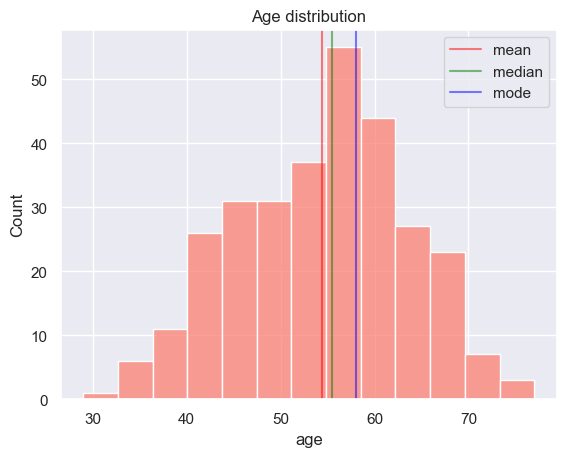

In [13]:
# plotting histogram

sns.histplot(x=age)
plt.axvline(age_mean, color='red', label='mean', alpha=0.5)
plt.axvline(age_median, color='green', label='median', alpha=0.5)
plt.axvline(age_mode, color='blue', label='mode', alpha=0.5)
plt.title("Age distribution")
plt.legend()
plt.show()

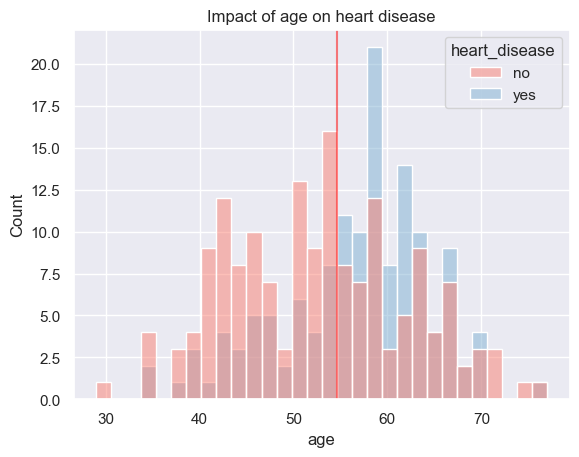

In [14]:
# plotting age distribution with respect to output

sns.histplot(x=age, hue=heart_disease, bins=30)
plt.axvline(54.6, color='red', alpha=0.5)
plt.title('Impact of age on heart disease')
plt.show()

Patients above the age of 54 are more likely to have a heart disease

<br>
<br>
<hr>

#### Gender

Gender of the patient

In [15]:
# extracting gender
gender = data.gender
gender.head(3)

0      male
1      male
2    female
Name: gender, dtype: object

In [16]:
# checking distribution
gender.value_counts()

male      206
female     96
Name: gender, dtype: int64

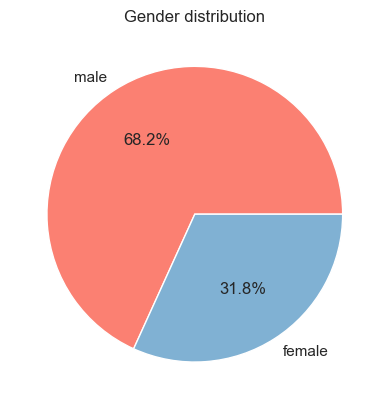

In [17]:
# pie chart

plt.pie(x=gender.value_counts().values, labels=gender.value_counts().index, autopct='%0.1f%%', colors=sns.color_palette())
plt.title('Gender distribution')
plt.show()

The dataset have more records of men than women

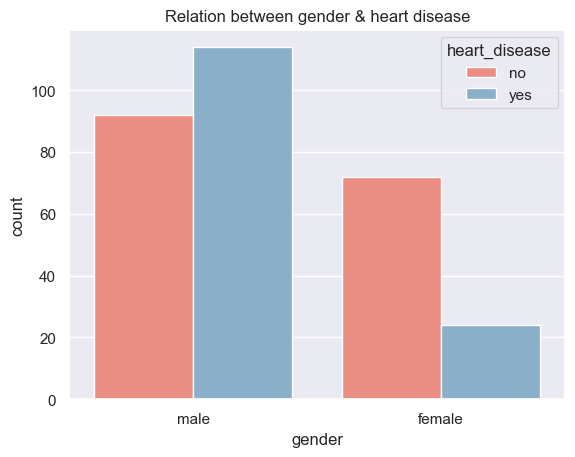

In [18]:
# correlation between gender and output

sns.countplot(x=gender, hue=heart_disease)
plt.title('Relation between gender & heart disease')
plt.xlabel('gender')
plt.show()

Men are more likely to have a heart disease than women

<br>

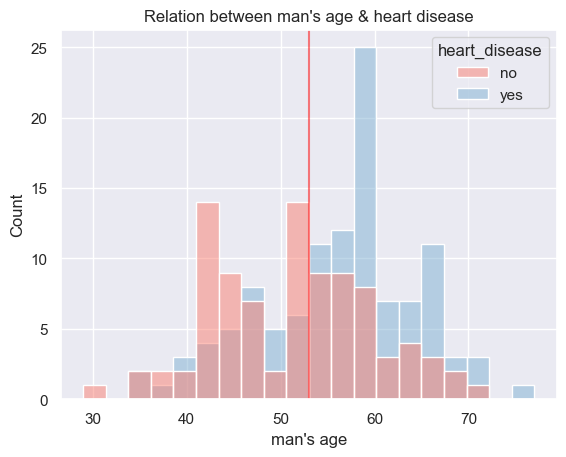

In [19]:
# relation between men and heart disease

sns.histplot(x=data[data.gender=='male'].age, hue=data[data.gender=='male'].heart_disease, bins=20)
plt.axvline(53, color='red', alpha=0.5)
plt.title("Relation between man's age & heart disease")
plt.xlabel("man's age")
plt.show()

Men older than 53 are more likely to have a heart disease

<br>

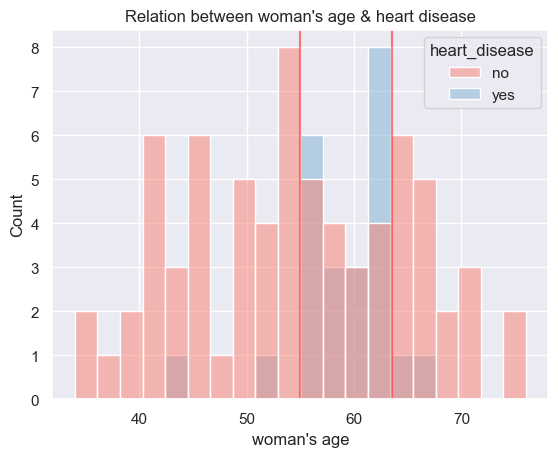

In [20]:
# relation between women and heart disease

sns.histplot(x=data[data.gender=='female'].age, hue=data[data.gender=='female'].heart_disease, bins=20)
plt.axvline(55, color='red', alpha=0.5)
plt.axvline(63.5, color='red', alpha=0.5)
plt.title("Relation between woman's age & heart disease")
plt.xlabel("woman's age")
plt.show()

Women between 55-64 are more likely to have a heart disease

<br>
<br>
<hr>

#### Chest pain

Type of chest pain felt by the patient<br>
```
0 -> typical angina
1 -> atypical angina
2 -> non-anginal pain
3 -> asymptomatic
```

In [21]:
# extracting chest pain
chest_pain = data.chest_pain
chest_pain.head(3)

0        asymptomatic
1    non-anginal pain
2     atypical angina
Name: chest_pain, dtype: object

In [22]:
# checking distribution
chest_pain.value_counts()

typical angina      143
non-anginal pain     86
atypical angina      50
asymptomatic         23
Name: chest_pain, dtype: int64

Most of the patients are suffering from type 0 chest pain `typical angina`

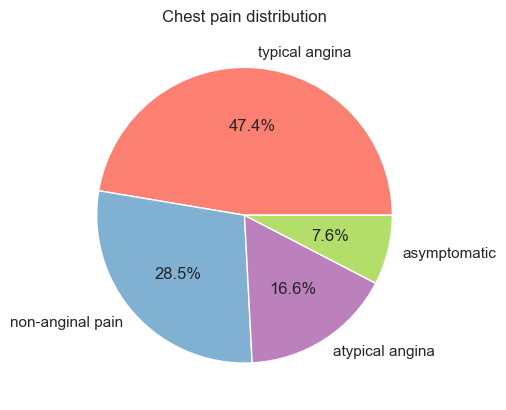

In [23]:
# pie chart

plt.pie(x=chest_pain.value_counts().values, labels=chest_pain.value_counts().index, autopct='%0.1f%%', colors=sns.color_palette())
plt.title('Chest pain distribution')
plt.show()

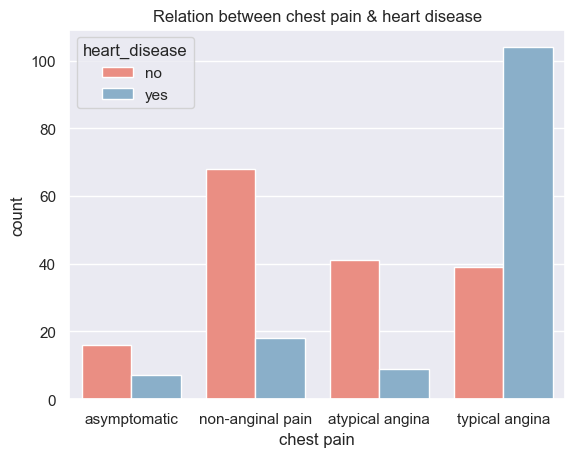

In [24]:
# correlation between chest pain and output

ax = sns.countplot(x=chest_pain, hue=heart_disease)
plt.title('Relation between chest pain & heart disease')
plt.xlabel('chest pain')
plt.show()

Patients having `typical angina` are most likely to have a heart disease

<br>
<br>

#### Resting blood pressure

Resting blood pressure of the patient in mmHg

In [25]:
# extracting resting BP
resting_blood_pressure = data.resting_blood_pressure
resting_blood_pressure.head(3)

0    145
1    130
2    130
Name: resting_blood_pressure, dtype: int64

In [26]:
# general stats
resting_blood_pressure.describe()

count    302.000000
mean     131.602649
std       17.563394
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: resting_blood_pressure, dtype: float64

Patient's blood pressure ranges from 94-200 mmHg

In [27]:
# calculating mean, mode and median

trtbps_mean = resting_blood_pressure.mean()
trtbps_median = resting_blood_pressure.median()
trtbps_mode = resting_blood_pressure.mode()[0]
print('trtbps mean:', trtbps_mean)
print('trtbps median:', trtbps_median)
print('trtbps mode:', trtbps_mode)

trtbps mean: 131.60264900662253
trtbps median: 130.0
trtbps mode: 120


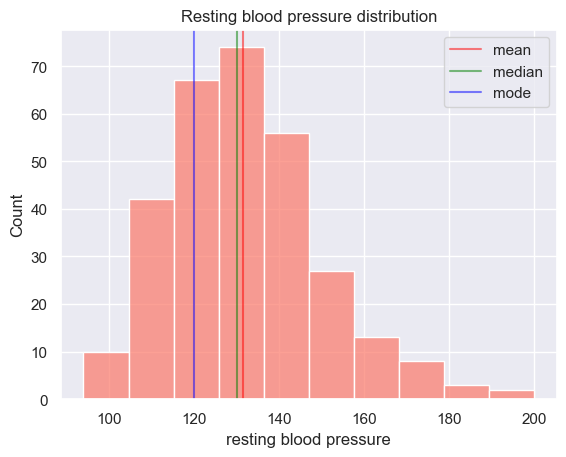

In [28]:
# plotting histogram

sns.histplot(x=resting_blood_pressure, bins=10)
plt.axvline(trtbps_mean, color='red', label='mean', alpha=0.5)
plt.axvline(trtbps_median, color='green', label='median', alpha=0.5)
plt.axvline(trtbps_mode, color='blue', label='mode', alpha=0.5)
plt.title("Resting blood pressure distribution")
plt.xlabel("resting blood pressure")
plt.legend()
plt.show()

The above distribution is slightly right skewed

<br>

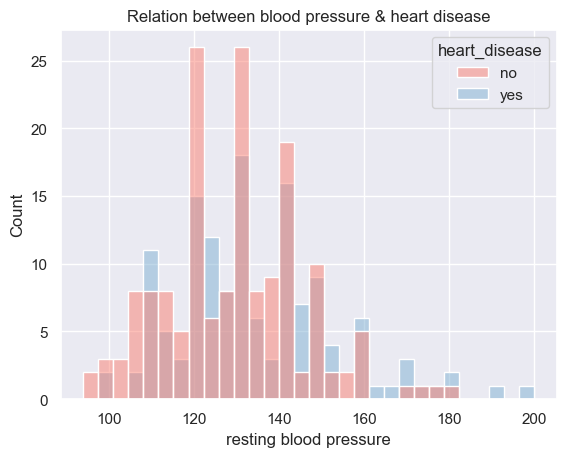

In [29]:
# correlation between resting BP and output

sns.histplot(x=resting_blood_pressure, hue=heart_disease, bins=30)
plt.title("Relation between blood pressure & heart disease")
plt.xlabel("resting blood pressure")
plt.show()

There is no fixed relation between resting blood pressure and heart disease.<br>
But the patients with high blood pressure are more likely to have a heart disease

<br>
<br>

#### Cholesterol

Patient's cholestoral in mg/dl

In [30]:
# extracting cholesterol
cholesterol = data.cholesterol
cholesterol.head(3)

0    233
1    250
2    204
Name: cholesterol, dtype: int64

In [31]:
# general stats
cholesterol.describe()

count    302.000000
mean     246.500000
std       51.753489
min      126.000000
25%      211.000000
50%      240.500000
75%      274.750000
max      564.000000
Name: cholesterol, dtype: float64

Cholesterol ranges from 126-564 mg/dl

In [32]:
# calculating mean, median and mode

chol_mean = cholesterol.mean()
chol_median = cholesterol.median()
chol_mode = cholesterol.mode()[0]
print('chol mean:', chol_mean)
print('chol median:', chol_median)
print('chol mode:', chol_mode)

chol mean: 246.5
chol median: 240.5
chol mode: 197


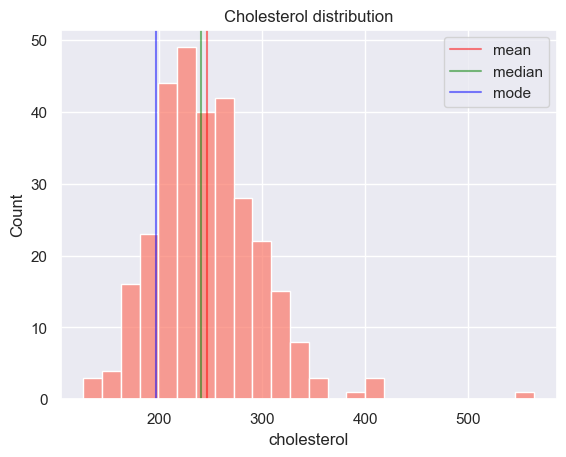

In [33]:
# plotting histogram

sns.histplot(x=cholesterol)
plt.axvline(chol_mean, color='red', label='mean', alpha=0.5)
plt.axvline(chol_median, color='green', label='median', alpha=0.5)
plt.axvline(chol_mode, color='blue', label='mode', alpha=0.5)
plt.title("Cholesterol distribution")
plt.xlabel('cholesterol')
plt.legend()
plt.show()

There are some outliers present in the feature

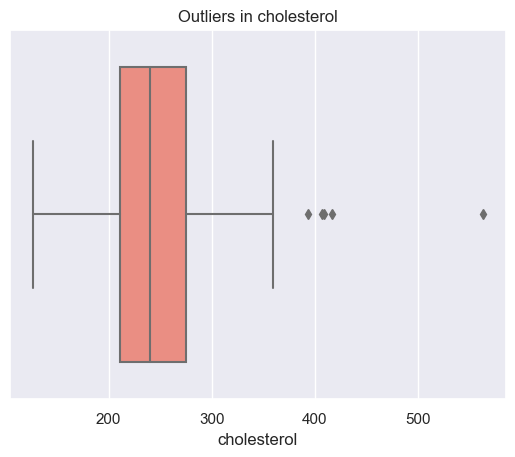

In [34]:
sns.boxplot(x=cholesterol)
plt.title("Outliers in cholesterol")
plt.xlabel('cholesterol')
plt.show()

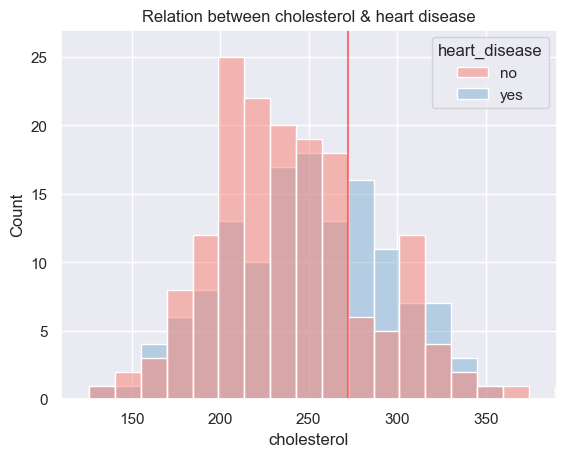

In [35]:
# correlation between cholesterol and output

sns.histplot(x=cholesterol, hue=heart_disease, bins=30)
plt.axvline(272, color='red', alpha=0.5)
plt.axis([110, 390, 0, 27])
plt.title("Relation between cholesterol & heart disease")
plt.xlabel('cholesterol')
plt.show()

Patient's having cholesterol more than 272 mg/dl are likely to have a heart disease

<br>

correlation coefficient: 0.20721550565611763


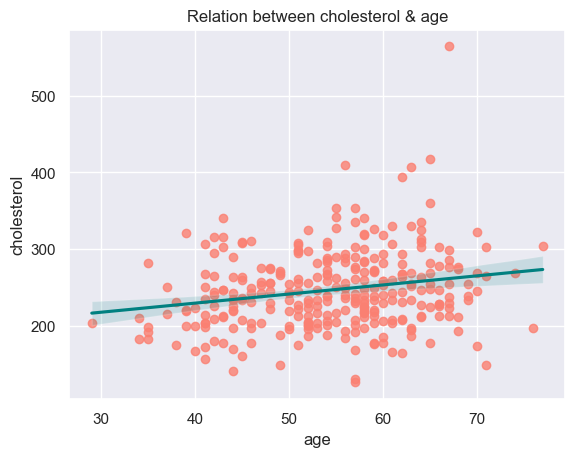

In [36]:
# correlation between age and cholesterol
print('correlation coefficient:', np.corrcoef(age, cholesterol)[0, 1])

# regression plot
sns.regplot(x=age, y=cholesterol, line_kws={'color': 'teal'})
plt.title("Relation between cholesterol & age")
plt.ylabel('cholesterol')
plt.show()

Patient's cholesterol tends to increase as his/her age increases